<a href="https://colab.research.google.com/github/pedrossntos/matriz-confusao/blob/main/matriz_confusao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import seaborn as sns
import pandas as pd

In [3]:
tf.__version__

'2.18.0'

In [5]:
%load_ext tensorboard # carrega a extensão do tensorboard no ambiente do notebook

In [6]:
logdir='log'  # define o diretório onde os logs do tensorboard serão armazenados

In [11]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()  # carrega o conjunto de dados MNIST, separando em treino e teste

train_images = train_images.reshape((60000, 28, 28, 1))  # remodela as imagens de treino para incluir um canal (escala de cinza)
test_images = test_images.reshape((10000, 28, 28, 1))  # remodela as imagens de teste para incluir um canal (escala de cinza)

train_images, test_images = train_images / 255.0, test_images / 255.0  # normaliza os valores dos pixels para o intervalo [0, 1]

classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]  # define as classes dos dígitos de 0 a 9


In [12]:
model = models.Sequential()  # inicializa um modelo sequencial

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))  # adiciona uma camada convolucional com 32 filtros, kernel 3x3, ativação ReLU e forma de entrada (28, 28, 1)
model.add(layers.MaxPooling2D((2, 2)))  # adiciona uma camada de pooling para reduzir a dimensionalidade da imagem (redução de 2x2)

model.add(layers.Conv2D(64, (3, 3), activation='relu'))  # adiciona uma segunda camada convolucional com 64 filtros e ativação ReLU
model.add(layers.MaxPooling2D((2, 2)))  # adiciona outra camada de pooling para reduzir a dimensionalidade

model.add(layers.Conv2D(64, (3, 3), activation='relu'))  # adiciona uma terceira camada convolucional com 64 filtros e ativação ReLU

model.add(layers.Flatten())  # achata os mapas de características em um vetor unidimensional para a entrada na camada densa
model.add(layers.Dense(64, activation='relu'))  # adiciona uma camada densa com 64 neurônios e ativação ReLU
model.add(layers.Dense(10, activation='softmax'))  # camada de saída com 10 neurônios (correspondentes às classes de 0 a 9) e ativação softmax para classificação


In [13]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1) ## cria um callback do TensorBoard para monitorar o treinamento, registrando histogramas a cada época

In [15]:
model.compile(optimizer='adam',  # compila o modelo usando o otimizador Adam
              loss='sparse_categorical_crossentropy',  # define a função de perda como entropia cruzada para classificação multiclasse
              metrics=['accuracy'])  # define a métrica de avaliação como acurácia

model.fit(x=train_images, y=train_labels,  # inicia o treinamento do modelo usando as imagens de treino e os rótulos de treino
          epochs=5,  # define o número de épocas (iterações) para o treinamento
          validation_data=(test_images, test_labels))  # fornece os dados de teste para validação a cada época


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 31ms/step - accuracy: 0.8895 - loss: 0.3399 - val_accuracy: 0.9846 - val_loss: 0.0452
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 72s 39ms/step - accuracy: 0.9854 - loss: 0.0480 - val_accuracy: 0.9902 - val_loss: 0.0335
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 118s 58ms/step - accuracy: 0.9900 - loss: 0.0331 - val_accuracy: 0.9909 - val_loss: 0.0269
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 90s 48ms/step - accuracy: 0.9928 - loss: 0.0233 - val_accuracy: 0.9888 - val_loss: 0.0341
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 151s 53ms/step - accuracy: 0.9949 - loss: 0.0165 - val_accuracy: 0.9902 - val_loss: 0.0312


In [16]:
y_true = test_labels  # define os rótulos reais dos dados de teste
y_pred = np.argmax(model.predict(test_images), axis=-1)  # faz a previsão do modelo e obtém a classe com maior probabilidade

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [17]:
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred)  # calcula a matriz de confusão com as previsões e os rótulos reais

con_mat_norm = np.around(con_mat.numpy().astype('float') / con_mat.numpy().sum(axis=1)[:, np.newaxis], decimals=2)  # normaliza a matriz de confusão

con_mat_df = pd.DataFrame(con_mat_norm, index=classes, columns=classes)  # converte a matriz de confusão normalizada para um DataFrame do Pandas

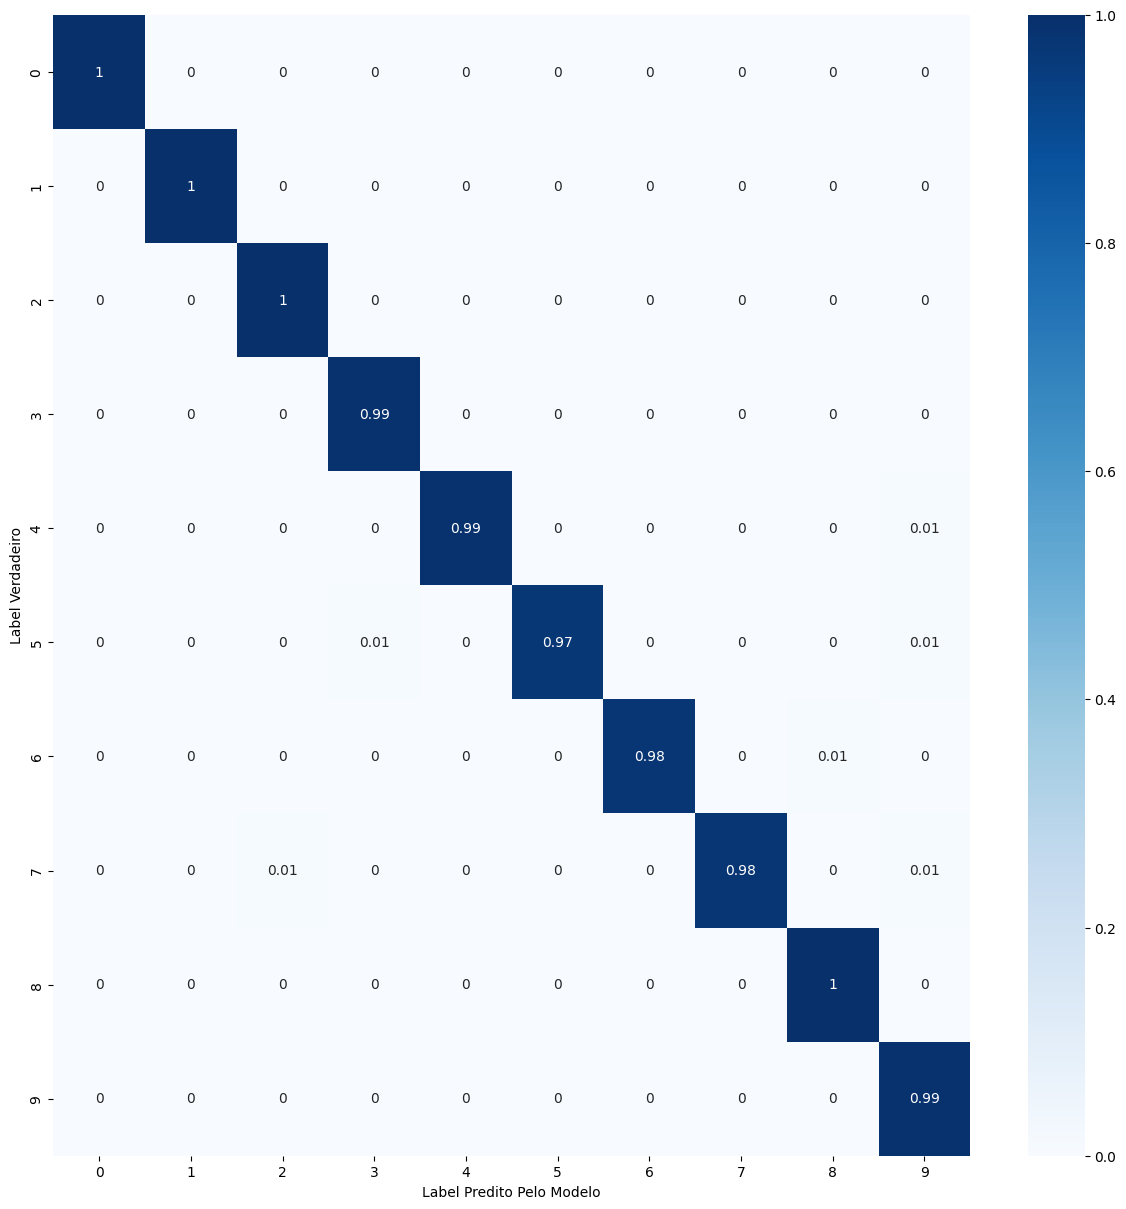

In [19]:
figure = plt.figure(figsize=(12, 12))
sns.heatmap(con_mat_df, annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('Label Verdadeiro')
plt.xlabel('Label Predito Pelo Modelo')
plt.show()

### Sensibilidade

A **sensibilidade** (ou **taxa de verdadeiro positivo**) é dada pela fórmula:

$$
\text{Sensibilidade} = \frac{TP}{TP + FN}
$$

Onde:
- \(TP\) (True Positives) são os verdadeiros positivos (número de casos positivos corretamente classificados como positivos).
- \(FN\) (False Negatives) são os falsos negativos (número de casos positivos classificados incorretamente como negativos).


In [25]:
sensibilidade = []

for i in range(10):
  TP = con_mat_df.iloc[i, i]
  FN = con_mat_df.iloc[i, :].sum() - TP
  sens = TP / (TP + FN)
  sensibilidade.append(sens)

df_sensibilidade = pd.DataFrame(sensibilidade, columns=['Sensibilidade'], index=con_mat_df.index)
display(df_sensibilidade)

,Sensibilidade
0,1.000000
1,1.000000
2,1.000000
3,1.000000
4,0.990000
5,0.979798
6,0.989899
7,0.980000
8,1.000000
9,1.000000


from matplotlib import pyplot as plt
df_sensibilidade['Sensibilidade'].plot(kind='hist', bins=20, title='Sensibilidade')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_sensibilidade['Sensibilidade'].plot(kind='line', figsize=(8, 4), title='Sensibilidade')
plt.gca().spines[['top', 'right']].set_visible(False)

### Especificidade


$$
\text{Especificidade} = \frac{TN}{TN + FP}
$$


In [26]:
especificidade = []

for i in range(10):
    TN = con_mat_df.drop(i, axis=0).drop(i, axis=1).sum().sum()
    FP = con_mat_df.iloc[:, i].sum() - con_mat_df.iloc[i, i]
    especificidade.append(TN / (TN + FP))

df_especificidade = pd.DataFrame(especificidade, columns=['Especificidade'], index=con_mat_df.index)
display(df_especificidade)


,Especificidade
0,1.000000
1,1.000000
2,0.998884
3,0.998885
4,1.000000
5,1.000000
6,1.000000
7,1.000000
8,0.998884
9,0.996656


from matplotlib import pyplot as plt
df_especificidade['Especificidade'].plot(kind='hist', bins=20, title='Especificidade')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_especificidade['Especificidade'].plot(kind='line', figsize=(8, 4), title='Especificidade')
plt.gca().spines[['top', 'right']].set_visible(False)

### Acurácia


$$
\text{Acurácia} = \frac{TP + TN}{TP + TN + FP + FN}
$$


In [28]:
acuracia = con_mat_df.to_numpy().diagonal().sum() / con_mat_df.sum().sum()

df_acuracia = pd.DataFrame([acuracia], columns=['Acurácia'], index=['Acurácia'])
display(df_acuracia)


,Acurácia
Acurácia,0.993976


### Precisão


$$
\text{Precisão} = \frac{TP}{TP + FP}
$$



In [29]:
precisao = []

for i in range(10):
    TP = con_mat_df.iloc[i, i]
    FP = con_mat_df.iloc[:, i].sum() - TP
    precisao.append(TP / (TP + FP))

df_precisao = pd.DataFrame(precisao, columns=['Precisão'], index=con_mat_df.index)
display(df_precisao)


,Precisão
0,1.000000
1,1.000000
2,0.990099
3,0.990000
4,1.000000
5,1.000000
6,1.000000
7,1.000000
8,0.990099
9,0.970588


### F1-Score


$$
\text{F1-Score} = 2 \times \frac{\text{Precisão} \times \text{Sensibilidade}}{\text{Precisão} + \text{Sensibilidade}}
$$

Ou, em termos de TP, FP e FN:

$$
\text{F1-Score} = 2 \times \frac{TP}{2 \times TP + FP + FN}
$$



In [30]:
f1_score = []

for i in range(10):
    TP = con_mat_df.iloc[i, i]
    FP = con_mat_df.iloc[:, i].sum() - TP
    FN = con_mat_df.iloc[i, :].sum() - TP
    precisão = TP / (TP + FP)
    sensibilidade = TP / (TP + FN)
    f1 = 2 * (precisão * sensibilidade) / (precisão + sensibilidade)
    f1_score.append(f1)

df_f1_score = pd.DataFrame(f1_score, columns=['F1 Score'], index=con_mat_df.index)
display(df_f1_score)


,F1 Score
0,1.000000
1,1.000000
2,0.995025
3,0.994975
4,0.994975
5,0.989796
6,0.994924
7,0.989899
8,0.995025
9,0.985075
